In [41]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
iris=load_iris()
X=iris.data
y=iris.target
y=y.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
scalar=StandardScaler()
X_train_sc=scalar.fit_transform(X_train)
X_test_sc=scalar.transform(X_test)

In [47]:
y_train_oh=tf.keras.utils.to_categorical(y_train,num_classes=3)
y_test_oh=tf.keras.utils.to_categorical(y_test,num_classes=3)

In [48]:
model=tf.keras.Sequential([tf.keras.layers.Dense(64,activation='relu',input_dim=4),
                          tf.keras.layers.Dense(32,activation='relu'),
                           tf.keras.layers.Dense(3,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epoch=100
a=model.fit(X_train_sc,y_train_oh,epochs=epoch,batch_size=32,validation_split=0.1)

In [46]:
loss,accuracy=model.evaluate(X_test_sc,y_test_oh)
print(f'test loss:{loss:.4f}')
print(f'accuracy:{accuracy:.4f}')

1/1 [==============================] - 0s 28ms/step - loss: 0.0506 - accuracy: 1.0000
test loss:0.0506
accuracy:1.0000


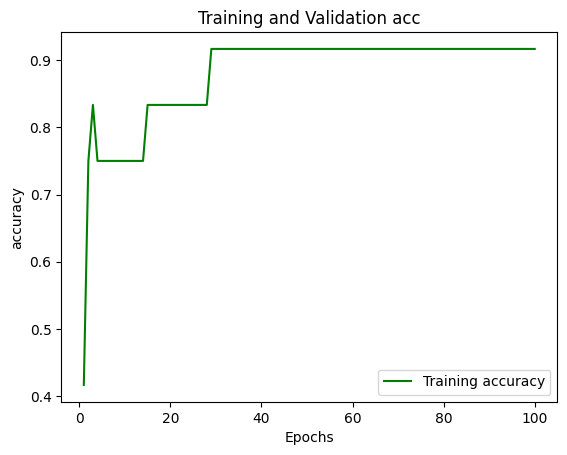

In [52]:
import matplotlib.pyplot as plt
loss_val = a.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,loss_val , 'g', label='Training accuracy')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

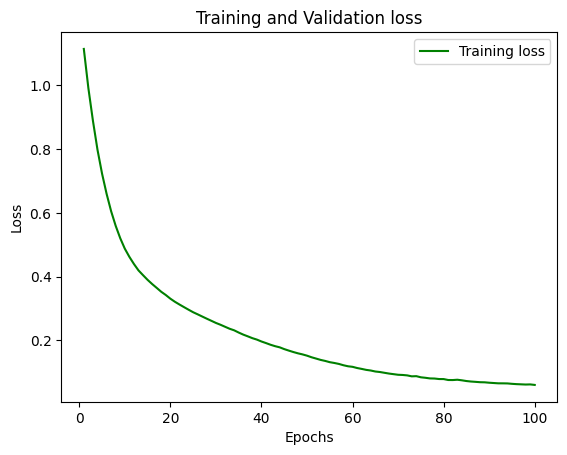

In [51]:
loss_val = a.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_val, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()